<a href="https://colab.research.google.com/github/JeffyWongo/CS105-project/blob/main/Copy_of_CS105_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Group 7 Team Members:
1. Nicholas Chao, nchao006, 862262333
2. Alexander Nguyen, anguy344, 862119928
3. Jeffrey Hwang, jhwan056, 862093523
4. Adeel Hussain, ahuss038, 862287512
5. Thien Pham, tpham108, 862107055

In [ ]:
from google.colab import files
import io

import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.neighbors import KNeighborsRegressor # https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
from sklearn.neighbors import KNeighborsClassifier # https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# 2. Data Cleaning

## Mount Drive

> Make Sure to Mount & Unmount between uses otherwise we will be able to see all your google drive data

> -Alex





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Read-in Data

In [ ]:
import os
weather_data_dir = os.listdir('/content/drive/Shareddrives/cs105_final_project/weather_data')
nox_data_dir = os.listdir('/content/drive/Shareddrives/cs105_final_project/nox_data')
pm25_data_dir=os.listdir('/content/drive/Shareddrives/cs105_final_project/pm25_data')

In [ ]:
weather_data_list = []
for file_name in weather_data_dir:
  tmp = pd.read_csv('/content/drive/Shareddrives/cs105_final_project/weather_data/' + file_name)
  tmp['DATE'] = pd.to_datetime(arg=tmp['DATE'],format='%Y-%m-%d')
  tmp=tmp.set_index('DATE')
  tmp.insert(0,'source_file',file_name)
  weather_data_list.append(tmp.copy())
weather_data = pd.concat(weather_data_list,axis=0)
weather_data=weather_data.sort_index()
weather_data

,source_file,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,AWND,DAPR,FMTM,MDPR,...,WT13,WT14,WT16,WT18,WT21,WV01,WV03,WV20,WESF,WT19
DATE,,,,,,,,,,,,,,,,,,,,,
2000-01-01,3262867.csv,USR0000CCHB,"CHEESEBORO CALIFORNIA, CA US",34.184700,-118.717200,502.9,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-01,3262867.csv,USC00040192,"ANAHEIM, CA US",33.864700,-117.842500,71.6,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-01,3262867.csv,USR0000CCHI,"CHILAO CALIFORNIA, CA US",34.331700,-118.030300,1661.2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-01,3262867.csv,USC00045790,"MONTEBELLO, CA US",34.019100,-118.105200,75.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-01,3262867.csv,USC00042214,"CULVER CITY, CA US",34.005000,-118.413900,28.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31,3262883.csv,US1CAOR0021,"ANAHEIM 4.9 ENE, CA US",33.863231,-117.791753,90.8,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-31,3262883.csv,US1CALA0010,"WHITTIER 2.9 WNW, CA US",33.986232,-118.066418,52.1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-31,3262883.csv,USC00040192,"ANAHEIM, CA US",33.864700,-117.842500,71.6,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
def transform_aqmis(data:pd.DataFrame,curr_year,name,verbose=False):
  df=data.copy()
  curr_month = 1
  date_vals = []
  aqmis_vals = []
  data_pairing={}
  for month in df.columns:
    curr_day = 1
    for date in df.index:
        if data.loc[date,month] != np.nan:
          date_vals.append(f'{curr_year}-{curr_month}-{curr_day}')
          aqmis_vals.append(data.loc[date,month])
        curr_day+=1
    curr_month+=1

  data_pairing = {
      'DATE':date_vals,
      name:aqmis_vals
  }
  transformed_data = pd.DataFrame(data=data_pairing)
  if verbose:
    print(f'transform_nox: {curr_year} \n date_vals ({len(date_vals)}):{date_vals} \n aqmis_vals ({len(aqmis_vals)}):{aqmis_vals} \n data_pairing:{data_pairing} \n{transformed_data}\n ')
  return transformed_data

nox_data_list = []
starting_year=2000
for file_name in nox_data_dir:
  tmp = pd.read_csv('/content/drive/Shareddrives/cs105_final_project/nox_data/'
                    #+ file_name,
                    + f'NOX_AREA1YR_{starting_year}-12-31.csv',
                    index_col=0,nrows=31)
  new_tmp = transform_aqmis(tmp,starting_year,name='Avg_NOx(ppm)',verbose=False)
  starting_year  += 1
  nox_data_list.append(new_tmp.copy())
nox_data=pd.concat(nox_data_list)
nox_data=nox_data.dropna(axis=0)
nox_data['DATE']=pd.to_datetime(nox_data['DATE'],format='%Y-%m-%d')
nox_data=nox_data.set_index('DATE').sort_index()
nox_data

,Avg_NOx(ppm)
DATE,
2000-01-01,0.149
2000-01-02,0.077
2000-01-03,0.229
2000-01-04,0.268
2000-01-05,0.416
...,...
2022-12-27,0.070
2022-12-28,0.028
2022-12-29,0.033


In [ ]:
pm25_data_list = []
starting_year=2000
for file_name in pm25_data_dir:
  #tmp = pd.read_csv('/content/drive/Shareddrives/cs105_final_project/pm25_data/' + file_name,
  #                  index_col=0, nrows=31)
  tmp = pd.read_csv('/content/drive/Shareddrives/cs105_final_project/pm25_data/'
                    + f'PM25_AREA1YR_{starting_year}-12-31.csv',
                    index_col=0, nrows=31)
  new_tmp = transform_aqmis(tmp,starting_year,name='Avg_pm25(ug/m3)')
  starting_year+=1
  pm25_data_list.append(new_tmp.copy())
pm25_data=pd.concat(pm25_data_list)
pm25_data=pm25_data.dropna(axis=0)
pm25_data['DATE']=pd.to_datetime(pm25_data['DATE'],format='%Y-%m-%d')
pm25_data=pm25_data.set_index('DATE').sort_index()
pm25_data

,Avg_pm25(ug/m3)
DATE,
2000-01-01,68.6
2000-01-02,7.5
2000-01-04,27.1
2000-01-05,30.2
2000-01-06,24.3
...,...
2022-12-27,20.0
2022-12-28,13.0
2022-12-29,11.3


## Cleaning The Data

In [ ]:
# https://docs.opendata.aws/noaa-ghcn-pds/readme.html columns' meanings
print(weather_data.columns)
weather_data.iloc[:,[14,15,16]].describe()
weather_data = weather_data.rename(columns=
    {
      'TMAX':'TMAX(degF)',
      'TMIN':'TMIN(degF)',
      'PRCP':'PRCP(10^-1mm)',
      'AWND':'AWND(10^-1m/s)'
    }

)
print(weather_data.columns)
# Potential Extra Features ["AWND","PRCP","ELEVATION"]

Index(['source_file', 'STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION',
       'AWND', 'DAPR', 'FMTM', 'MDPR', 'PGTM', 'PRCP', 'SNOW', 'SNWD', 'TAVG',
       'TMAX', 'TMIN', 'TOBS', 'TSUN', 'WDF2', 'WDF5', 'WESD', 'WSF2', 'WSF5',
       'WT01', 'WT02', 'WT03', 'WT04', 'WT05', 'WT06', 'WT07', 'WT08', 'WT09',
       'WT10', 'WT11', 'WT13', 'WT14', 'WT16', 'WT18', 'WT21', 'WV01', 'WV03',
       'WV20', 'WESF', 'WT19'],
      dtype='object')
Index(['source_file', 'STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION',
       'AWND(10^-1m/s)', 'DAPR', 'FMTM', 'MDPR', 'PGTM', 'PRCP(10^-1mm)',
       'SNOW', 'SNWD', 'TAVG', 'TMAX(degF)', 'TMIN(degF)', 'TOBS', 'TSUN',
       'WDF2', 'WDF5', 'WESD', 'WSF2', 'WSF5', 'WT01', 'WT02', 'WT03', 'WT04',
       'WT05', 'WT06', 'WT07', 'WT08', 'WT09', 'WT10', 'WT11', 'WT13', 'WT14',
       'WT16', 'WT18', 'WT21', 'WV01', 'WV03', 'WV20', 'WESF', 'WT19'],
      dtype='object')


When reading in the columns for temperature, we found that the TAVG column was missing too much data, so we chose not to include it in our analysis for the EDA section.

In [ ]:
weather_data['NAME'].value_counts()

LONG BEACH DAUGHERTY AIRPORT, CA US         8401
LOS ANGELES INTERNATIONAL AIRPORT, CA US    8401
U C L A, CA US                              8401
LOS ANGELES DOWNTOWN USC, CA US             8401
HAWTHORNE MUNICIPAL AIRPORT, CA US          8399
                                            ... 
SOUTH GATE 1.1 WNW, CA US                    112
BREA DAM, CA US                               90
FULLERTON DAM, CA US                          90
CARBON CANYON GILMAN, CA US                   90
ORANGE CO RESERVOIR, CA US                    90
Name: NAME, Length: 120, dtype: int64

In [ ]:
select_station = weather_data[['source_file','NAME','TMAX(degF)','TMIN(degF)','PRCP(10^-1mm)','AWND(10^-1m/s)']].sort_index()
select_station = select_station[select_station['NAME'] == 'LOS ANGELES INTERNATIONAL AIRPORT, CA US']
select_station.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8401 entries, 2000-01-01 to 2022-12-31
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   source_file     8401 non-null   object 
 1   NAME            8401 non-null   object 
 2   TMAX(degF)      8401 non-null   float64
 3   TMIN(degF)      8401 non-null   float64
 4   PRCP(10^-1mm)   8401 non-null   float64
 5   AWND(10^-1m/s)  8401 non-null   float64
dtypes: float64(4), object(2)
memory usage: 459.4+ KB


In [ ]:
weather_data = weather_data[weather_data['NAME']=='LOS ANGELES INTERNATIONAL AIRPORT, CA US']
weather_data = weather_data[['TMAX(degF)','TMIN(degF)','PRCP(10^-1mm)','AWND(10^-1m/s)']]
weather_data.describe()

,TMAX(degF),TMIN(degF),PRCP(10^-1mm),AWND(10^-1m/s)
count,8401.000000,8401.000000,8401.000000,8401.000000
mean,70.536841,56.748363,0.028995,7.192400
std,7.352978,6.782120,0.165484,2.128377
min,51.000000,35.000000,0.000000,1.790000
25%,65.000000,52.000000,0.000000,5.820000
50%,70.000000,57.000000,0.000000,6.930000
75%,75.000000,62.000000,0.000000,8.280000
max,105.000000,77.000000,4.530000,21.030000


## Final Dataset

In [ ]:
full_data = pd.concat([weather_data,nox_data,pm25_data],axis=1)
full_data=full_data.replace('',np.nan).dropna(axis=0)

#nans=pd.to_numeric(full_data['Avg_pm25(ug/m3)'],errors='coerce').isna()
full_data['Avg_pm25(ug/m3)'] = pd.to_numeric(full_data['Avg_pm25(ug/m3)'],errors='coerce').dropna(axis=0)
full_data = full_data.astype(float).dropna(axis=0)
full_data.info()
#full_data.to_csv("cleaned_full_data.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8395 entries, 2000-01-01 to 2022-12-31
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TMAX(degF)       8395 non-null   float64
 1   TMIN(degF)       8395 non-null   float64
 2   PRCP(10^-1mm)    8395 non-null   float64
 3   AWND(10^-1m/s)   8395 non-null   float64
 4   Avg_NOx(ppm)     8395 non-null   float64
 5   Avg_pm25(ug/m3)  8395 non-null   float64
dtypes: float64(6)
memory usage: 459.1 KB


# 3. EDA


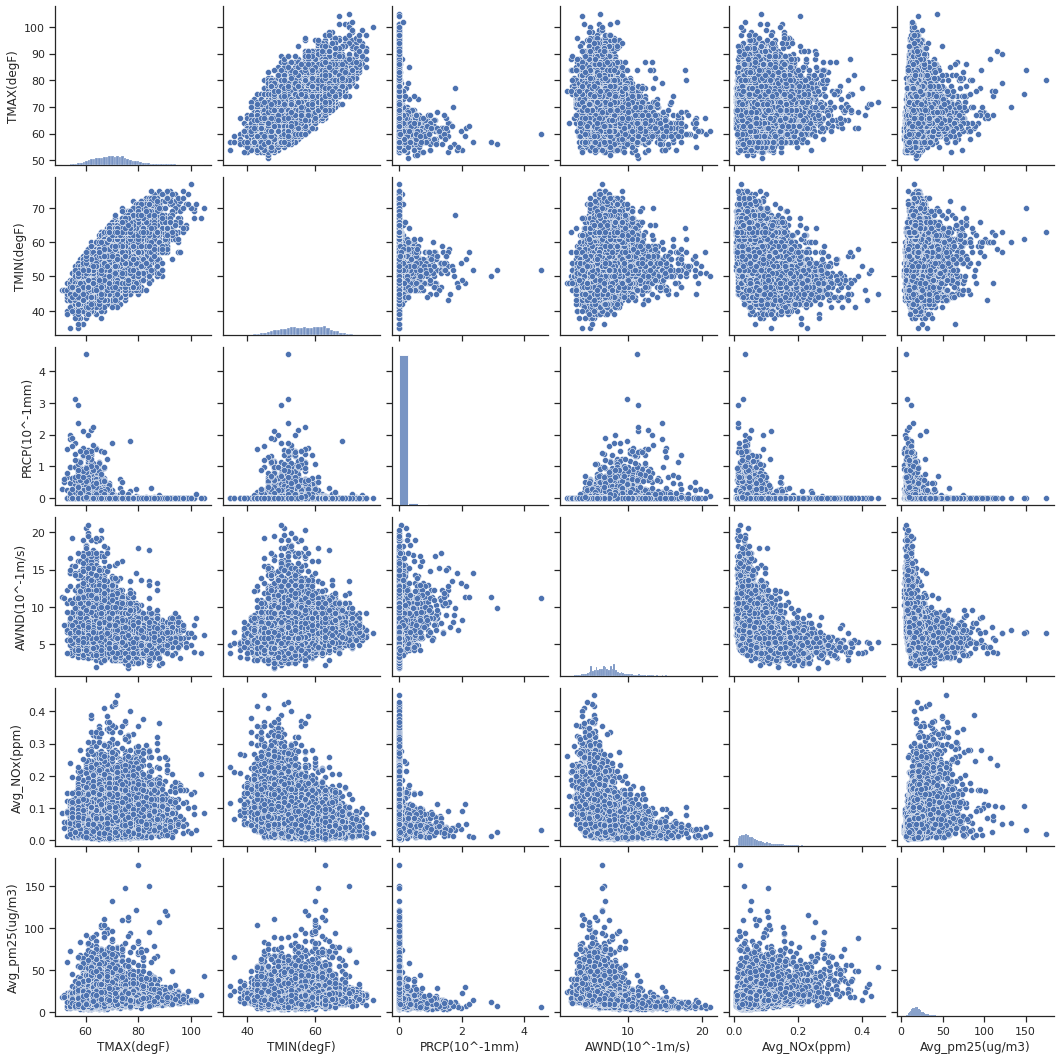

In [ ]:
sns.set_theme(style='ticks')
sns.pairplot(full_data)

The pairplot above shows the relationships between the features we selected for the weather datasets.

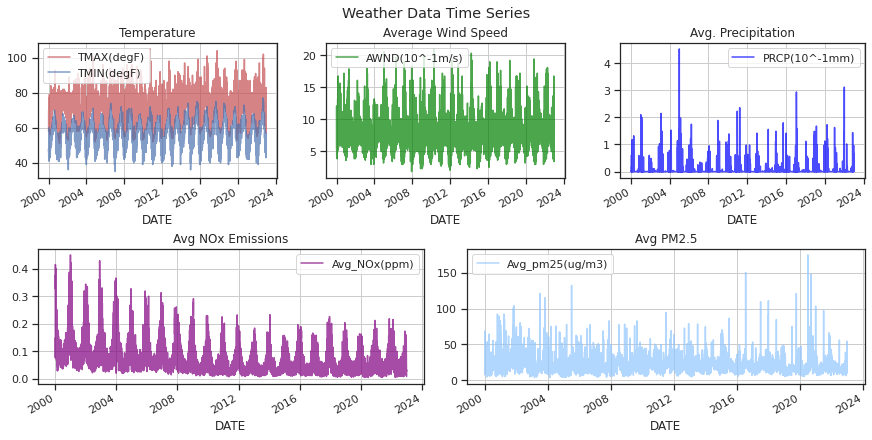

In [ ]:
import matplotlib.gridspec as gs
gdrive_plot_folder='/content/drive/Shareddrives/cs105_final_project/plots/'
#time_series_fig, time_series_ax = plt.subplots(ncols=3, nrows=2, figsize = (12,6),
#                                layout='constrained')
plt.style.use('seaborn-v0_8-pastel')
time_series_fig = plt.figure(layout='constrained',figsize=(12,6))
time_series_gs =gs.GridSpec(2,6, figure=time_series_fig)
time_series_ax=[
    time_series_fig.add_subplot(time_series_gs[0,0:2]),
    time_series_fig.add_subplot(time_series_gs[0,2:4]),
    time_series_fig.add_subplot(time_series_gs[0,4:6]),
    time_series_fig.add_subplot(time_series_gs[1,0:3]),
    time_series_fig.add_subplot(time_series_gs[1,3:6])
]

full_data.plot(title = 'Temperature', ax=time_series_ax[0],
               y = ['TMAX(degF)', 'TMIN(degF)'], style = ['-r', '-b'], grid=True ,alpha=0.7)

full_data.plot(title = 'Average Wind Speed', ax=time_series_ax[1],
               y = ['AWND(10^-1m/s)'], color = 'green', grid=True,alpha=0.7)

full_data.plot(title='Avg. Precipitation', ax=time_series_ax[2],
               y= ['PRCP(10^-1mm)'], color = 'blue', grid=True, alpha=0.7)

full_data.plot(title = 'Avg NOx Emissions', ax=time_series_ax[3],
               y = ['Avg_NOx(ppm)'], color = 'purple', grid=True, alpha=0.7)

full_data.plot(title = 'Avg PM2.5', ax=time_series_ax[4],
               y = ['Avg_pm25(ug/m3)'], grid=True,alpha=0.7)


time_series_fig.suptitle('Weather Data Time Series')
time_series_fig.savefig(gdrive_plot_folder + 'weather_data_tseries.jpg')

The plots above visualize the changes in each feature over time.

Temperature, average wind speed, and average precipitation remain fairly consistent across the 22 years of data we analyzed. **NOx clearly decreases** over the past 20 years while the particulate matter 2.5mm (PM2.5) appears to follow a similar trend, with significant spikes in average values towards 2021.


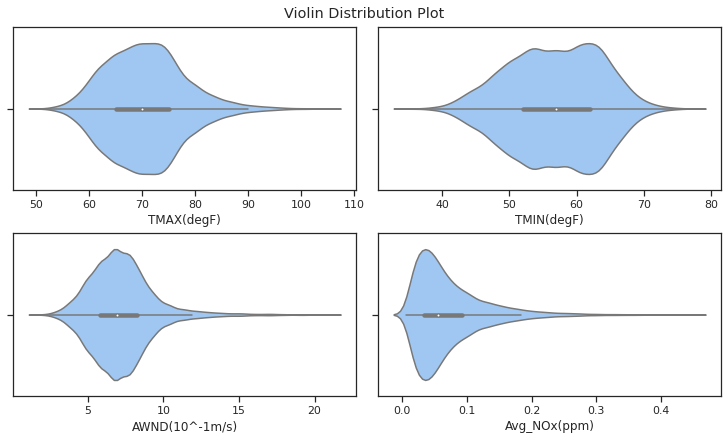

In [ ]:
violin_fig, violin_ax = plt.subplots(nrows=2,ncols=2, figsize=(10,6),
                                      layout='constrained')

tmaxplot = full_data['TMAX(degF)']
sns.violinplot(x = tmaxplot,ax=violin_ax[0,0])
tminplot = full_data['TMIN(degF)']
sns.violinplot(x = tminplot,ax=violin_ax[0,1])
awndplot = full_data['AWND(10^-1m/s)']
sns.violinplot(x = awndplot,ax=violin_ax[1,0])
noxplot = full_data['Avg_NOx(ppm)']
sns.violinplot(x = noxplot,ax=violin_ax[1,1])

violin_fig.suptitle('Violin Distribution Plot')
violin_fig

violin_fig.savefig(gdrive_plot_folder + 'violin_plots.jpg')

The two violin plots above show the distribution in data for the temperature maximums and minimums in degrees celsius.
- The TMAX violin plot shows that the average maximum temperature in LA was fairly consistent with a slight skew towards the right.

The third violin plot show the distribution of average daily wind speed (AWND).
- The third violin plots is also skewed to the right, meaning its values were also fairly consistent.


The fourth violin plots shows the distribution of the nitrous oxide data.
- The fourth violin plot is heavily skewed to the right, indicating the nitrous oxide data contains multiple months where the average levels were significantly higher than usual.

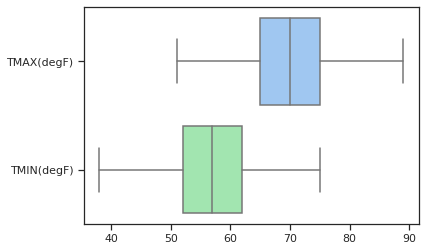

In [ ]:
# https://www.pluralsight.com/guides/cleaning-up-data-from-outliers
# drops outliers from the TMAX, TMIN, AWND columns and plots their statistics as boxplot
boxplotdata = full_data

q1_TMAX = boxplotdata['TMAX(degF)'].quantile(0.25)
q3_TMAX = boxplotdata['TMAX(degF)'].quantile(0.75)
TMAX_IQR = q3_TMAX - q1_TMAX
index = boxplotdata[(boxplotdata['TMAX(degF)'] <= (q1_TMAX - 1.5*TMAX_IQR)) | (boxplotdata['TMAX(degF)'] >= (q3_TMAX + 1.5*TMAX_IQR))].index
boxplotdata.drop(index, inplace=True)

q1_TMIN = boxplotdata['TMIN(degF)'].quantile(0.25)
q3_TMIN = boxplotdata['TMIN(degF)'].quantile(0.75)
TMIN_IQR = q3_TMIN - q1_TMIN
index = boxplotdata[(boxplotdata['TMIN(degF)'] <= (q1_TMIN - 1.5*TMIN_IQR)) | (boxplotdata['TMIN(degF)'] >= (q3_TMIN + 1.5*TMIN_IQR))].index
boxplotdata.drop(index, inplace=True)

boxplotGraph = sns.boxplot(data=boxplotdata.iloc[:,[0,1]], orient='h')

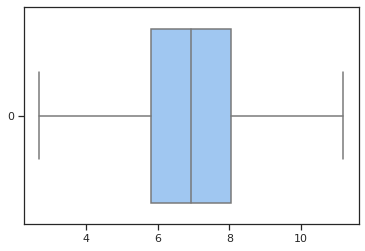

In [ ]:
q1_AWND = boxplotdata['AWND(10^-1m/s)'].quantile(0.25)
q3_AWND = boxplotdata['AWND(10^-1m/s)'].quantile(0.75)
AWND_IQR = q3_AWND - q1_AWND
index = boxplotdata[(boxplotdata['AWND(10^-1m/s)'] <= (q1_AWND - 1.5*AWND_IQR)) | (boxplotdata['AWND(10^-1m/s)'] >= (q3_AWND + 1.5*AWND_IQR))].index
boxplotdata.drop(index, inplace=True)

boxplotGraph2 = sns.boxplot(data=boxplotdata.iloc[:,3], orient='h')

The Q1, Q3, and IQR values for TMAX, TMIN, and AWND were calculated to remove outlier datapoints for the boxplots. The boxplots visualize the distributions of the three features and show related statistics such as the minimums, maximums, and mean values for each feature type.

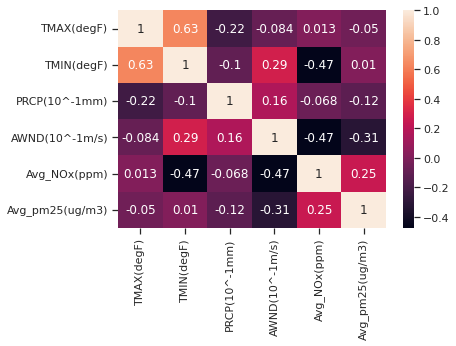

In [ ]:
pearsonTest = full_data.corr()
sns.heatmap(pearsonTest, annot=True)
plt.show()

The heat map above shows the correlations between the features we chose to analyze in our weather and weather air condition datasets.

As one would expect, there is a strong positive correlation between TMAX and TMIN values.

While a majority of the features appear to have minimal negative to relatively strong negative correlation, along with no correlation, there are a few correlations that stand out.
- Average daily wind speed (AWND) appears to have a slight positive correlation with TMIN and PRCP, indicating a possible relation between the two features.
- Average Particulate Matter 2.5mm (PM2.5) and average nitrous oxide ppm also appear to have a slight positive correlation with each other.

# 4. Main Part

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline

# Normalize attributes to use for KNN
normalized_full_data = full_data.copy()

scaler = StandardScaler()

normalized_full_data = scaler.fit_transform(normalized_full_data[['TMAX(degF)', 'TMIN(degF)', 'PRCP(10^-1mm)', 'AWND(10^-1m/s)']])
normalized_data = normalized_full_data = pd.DataFrame(normalized_full_data, columns=['TMAX(degF)', 'TMIN(degF)', 'PRCP(10^-1mm)', 'AWND(10^-1m/s)'],index=full_data.index)
X = normalized_full_data[['TMAX(degF)', 'TMIN(degF)', 'PRCP(10^-1mm)', 'AWND(10^-1m/s)']] # normalized attributes to predict Avg NOx emission
y = full_data['Avg_NOx(ppm)']
y_2=full_data['Avg_pm25(ug/m3)']

In order to use K-NN regression with our dataset, we begin with standardizing the values in each feature column.

To test our K-NN regression model, we conduct leave-one-out cross-validation with train-test split.

##LOO - Cross Validation

In [ ]:
from math import sqrt
from statistics import mean
from sklearn.model_selection import cross_validate

# KNN with K = √n
k = int(np.rint(sqrt(len(full_data.index))))
n_splits = 5
print(f'k: {k}')
print(f'No of Splits: {n_splits}')
model = KNeighborsRegressor(k)

cv = cross_validate(estimator=model,X=X, y=y, cv=n_splits,
                    scoring = ['r2', 'neg_mean_squared_error'],
                    return_train_score=True)

cv_mse = cv['test_neg_mean_squared_error']
print(f'Cross Validation For NO_x:\n    Avg MSE:{abs(mean(cv_mse))}')


k: 89
No of Splits: 5
Cross Validation For NO_x:
    Avg MSE:0.002177132105184458


The code block above runs cross-validation by splitting the data into 5 splits to test the performance of the model. The average mean-squared error is calculated from the cross-validation test for nitrous oxide and the result is a very small value. This means the model is adequate for predicting nitrous oxide levels.

In [ ]:
model_2 = KNeighborsRegressor(k)

cv = cross_validate(estimator=model_2,X=X, y=y_2, cv=n_splits,
                    scoring = ['r2', 'neg_mean_squared_error'],
                    return_train_score=True)

cv_mse = cv['test_neg_mean_squared_error']
print(f'Cross Validation For PM_2.5:\n    Avg MSE:{abs(mean(cv_mse))}')

Cross Validation For PM_2.5:
    Avg MSE:126.752013436464


However, when running leave-one-out cross-validation on the Particulate Matter 2.5mm (PM2.5) data, the results are not as great for the model. The average mean-squared error is 126.75, indicating a significant amount of error for predictions.

## LOO - Train Test Split Test

For NOx:
    MSE: 0.0017230499233930065


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


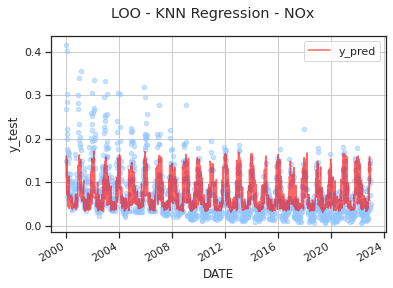

In [ ]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 5)

model = KNeighborsRegressor(k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred = pd.Series(y_pred,index=X_test.index,name='y_pred')
# Evaluate model
print(f'For NOx:\n    MSE: {mean_squared_error(y_test, y_pred)}')

import matplotlib.pyplot as plt
y_test=pd.Series(y_test,name='y_test')
loo_data = pd.concat([y_test,y_pred],axis=1)
loo_data=loo_data.reset_index()

fig, ax = plt.subplots()
loo_data.plot.scatter(x='DATE',y='y_test',ax=ax,grid=True,legend=True,alpha=0.5)
loo_data.plot.line(x='DATE',y='y_pred',ax=ax,c='red',grid=True,alpha=0.6)
fig.suptitle('LOO - KNN Regression - NOx')
fig.savefig(gdrive_plot_folder + 'knn_regression_nox.jpg')

For PM2.5:
    MSE: 121.62289012865972


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


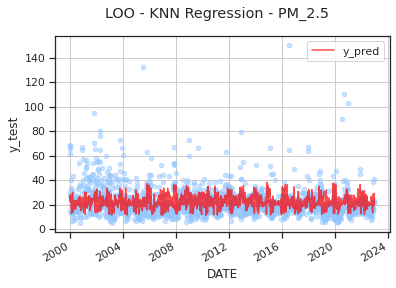

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_2, test_size = .2, random_state = 5)
model = KNeighborsRegressor(k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred = pd.Series(y_pred,index=X_test.index,name='y_pred')
# Evaluate model
print(f'For PM2.5:\n    MSE: {mean_squared_error(y_test, y_pred)}')

y_test=pd.Series(y_test,name='y_test')
loo_data = pd.concat([y_test,y_pred],axis=1)
loo_data=loo_data.reset_index()

fig, ax = plt.subplots()
loo_data.plot.scatter(x='DATE',y='y_test',ax=ax,grid=True,legend=True,alpha=0.5)
loo_data.plot.line(x='DATE',y='y_pred',ax=ax,c='red',grid=True,alpha=0.7)
fig.suptitle('LOO - KNN Regression - PM_2.5')

fig.savefig(gdrive_plot_folder + 'knn_regression_pm25.jpg')

In the code blocks above, we train the models using parts of the data and evaluate its performance when testing it, as indicated by the calculated mean-squared error outputs.

* In the train test split step, we trained the model on 80% of the data, and used 20% of it to test. The nitrous oxide model was fairly decent at predicting, with the predicted values being off by 0.0004 from the actual values.

* The particulate matter 2.5mm model performed poorly as we had predicted based on the high mean-squared error value from the cross-validation step. The predicted value mean-squared error is quite a bit lower than the actual value from the cross-validation step.



#KNN Classifier

In [ ]:
#https://www.airnow.gov/sites/default/files/2020-05/aqi-technical-assistance-document-sept2018.pdf AQI Calculations guide
# AQI Calculations for pm2.5
def AQIpm25(pm25):
  if pm25 <= 0:
    return 0
  if pm25 <= 12.0:
    BPHi = 12.0
    BPLo = 0.0
    IHi = 50
    ILo = 0
  elif pm25 <= 35.4:
    BPHi = 35.4
    BPLo = 12.1
    IHi = 100
    ILo = 51
  elif pm25 <= 55.4:
    BPHi = 55.4
    BPLo = 35.5
    IHi = 150
    ILo = 101
  elif pm25 <= 150.4:
    BPHi = 150.4
    BPLo = 55.5
    IHi = 200
    ILo = 151
  elif pm25 <= 250.4:
    BPHi = 250.4
    BPLo = 150.5
    IHi = 300
    ILo = 201
  elif pm25 <= 350.4:
    BPHi = 350.4
    BPLo = 250.5
    IHi = 400
    ILo = 301
  elif pm25 <= 500.4:
    BPHi = 500.4
    BPLo = 350.5
    IHi = 500
    ILo = 401
  else:
    return 0
  AQI = ((IHi - ILo)/(BPHi - BPLo)) * (pm25 - BPLo) + ILo
  return AQI

# AQI Calculations for NOx, using NO2 respective breakpoints and AQI values
# Data is in ppm, equation is in ppb, divide breakpoint values by 1000
def AQINOx(NOx):
  if NOx <= 0:
    return 0
  if NOx <= .0053:
    BPHi = 53.0
    BPLo = 0.0
    IHi = 50
    ILo = 0
  elif NOx <= 0.1:
    BPHi = .1
    BPLo = .054
    IHi = 100
    ILo = 51
  elif NOx <= .36:
    BPHi = .36
    BPLo = .101
    IHi = 150
    ILo = 101
  elif NOx <= .649:
    BPHi = .649
    BPLo = .361
    IHi = 200
    ILo = 151
  elif NOx <= 1.249:
    BPHi = 1.249
    BPLo = .65
    IHi = 300
    ILo = 201
  elif NOx <= 1.649:
    BPHi = 1.649
    BPLo = 1.25
    IHi = 400
    ILo = 301
  elif NOx <= 2.049:
    BPHi = 2.049
    BPLo = 1.65
    IHi = 500
    ILo = 401
  else:
    return 0
  AQI = ((IHi - ILo)/(BPHi - BPLo)) * (NOx - BPLo) + ILo
  return AQI

# https://www.sparetheair.com/assets/aqi/AQI%20Chart%20PM_FINAL.png
# AQI Labels based on AQI values
def AQI_Label(AQI):
  if AQI <= 50:
    return 'Good'
  elif AQI <= 100:
    return 'Moderate'
  elif AQI <= 150:
    return 'Unhealthy for Sensitive Groups'
  elif AQI <= 200:
    return 'Unhealthy'
  elif AQI <= 300:
    return 'Very Unhealthy'
  else:
    return 'Hazardous'

In [ ]:
full_data['AQIpm25'] = full_data['Avg_pm25(ug/m3)'].apply(AQIpm25) # AQI pm2.5
full_data['AQINOx'] = full_data['Avg_NOx(ppm)'].apply(AQINOx) # AQI NOx
AQI = np.maximum(full_data['AQINOx'], full_data['AQIpm25'])
full_data = full_data.assign(AQI = AQI) # AQI based on higher AQI values of PM2.5 and NOx
full_data['AQI_Label'] = full_data['AQI'].apply(AQI_Label) # AQI

In [ ]:
normalized_aqi_data = full_data.loc[:, ['Avg_NOx(ppm)', 'Avg_pm25(ug/m3)', 'AQI', 'AQI_Label']].copy()
scaler = MinMaxScaler()
normalized_aqi_data = scaler.fit_transform(normalized_aqi_data[['Avg_NOx(ppm)', 'Avg_pm25(ug/m3)']])
normalized_aqi_data = pd.DataFrame(normalized_aqi_data, columns=['Avg_NOx(ppm)', 'Avg_pm25(ug/m3)'])
X = normalized_aqi_data[['Avg_NOx(ppm)', 'Avg_pm25(ug/m3)']] # normalized attributes to predict Avg NOx emission
y = full_data['AQI_Label']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 5)
classifier_model = KNeighborsClassifier(k)
classifier_model.fit(X_train, y_train)
y_pred = classifier_model.predict(X_test)

# Model evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = 'weighted')
recall = recall_score(y_test, y_pred, average = 'weighted')

print('Accuracy score:', accuracy)
print('Precision score:', precision)
print('Recall score:', recall)
print(confusion_matrix(y_test, y_pred))

Accuracy score: 0.9839189994044074
Precision score: 0.9841713920974978
Recall score: 0.9839189994044074
[[ 151    3    0    0]
 [   2 1083    0    0]
 [   0    0   12   16]
 [   0    6    0  406]]


In the code blocks above, K-NN classifier was used and was successful in classifying PM2.5 and NOx values in their corresponding AQI categories with high accuracy. The confusion matrix and its following statistics summarize K-NN classifier's performance with our dataset.

# Unmount Drive

> Should be safe to unmount after reading in the data

In [ ]:
from google.colab import drive
drive.flush_and_unmount()